In [92]:
N_1 = append!( [32:32:1024;],[1024:128:2048;])
N = N_1

41-element Array{Int64,1}:
   32
   64
   96
  128
  160
  192
  224
  256
  288
  320
  352
  384
  416
    ⋮
  960
  992
 1024
 1024
 1152
 1280
 1408
 1536
 1664
 1792
 1920
 2048

In [93]:
function hoshen_kopel_main(;N=100, output="output.png", benchmarkOutputFile="benchmark_results.dat", occupationProbability=0.59)
    readall(`../build/src/main -N $N -b $benchmarkOutputFile -p $occupationProbability`)
end

hoshen_kopel_main (generic function with 1 method)

In [94]:
for n in N
    hoshen_kopel_main(N=n, benchmarkOutputFile="benchmark_results_n"*string(n)*".dat")
end

In [95]:
num_threads = 8

8

In [96]:
size = N[end]

2048

In [116]:
raw_data = zeros(4+2*num_threads, length(N))

for i in 1:length(N)
    n = N[i]
    tmp = readdlm("benchmarks/benchmark_results_n"*string(n)*".dat")
    raw_data[:, i] = convert(Array{Float64, 1}, tmp[:, 1])
end


In [117]:
#remove run caches warm benchmarks
data = raw_data[3:end,:]
hoshen_naive = data[1,:];
hoshen_uf = data[2,:];
hoshen_naive_pthreads = data[3:3+num_threads-1,:];
hoshen_uf_pthreads = data[3+num_threads:3+2*num_threads-1,:];

In [118]:
hoshen_naive

1x41 Array{Float64,2}:
 0.001567  0.00331421  0.0106579  …  45.9729  29.0779  34.3663  48.9574

In [119]:
hoshen_naive_pthreads

8x41 Array{Float64,2}:
 0.00241739  0.00355831  0.0120146   …  32.12     36.1191   37.695  
 0.00210275  0.00348444  0.00966456     18.4968   22.1498   22.5446 
 0.00181138  0.00332794  0.00768184     11.8892   14.8028   15.5418 
 0.00194108  0.00271152  0.00777567      8.01045  12.8535   10.3647 
 0.00168417  0.00295681  0.00792572      7.48765  10.8147    7.96756
 0.00181037  0.00308773  0.00978439  …   6.86525   8.96659   7.33698
 0.00198599  0.00291532  0.00896072      6.80635   7.94967   6.25151
 0.00356601  0.00410417  0.00858893      6.06658   7.03681   5.76528

In [101]:
using PyPlot

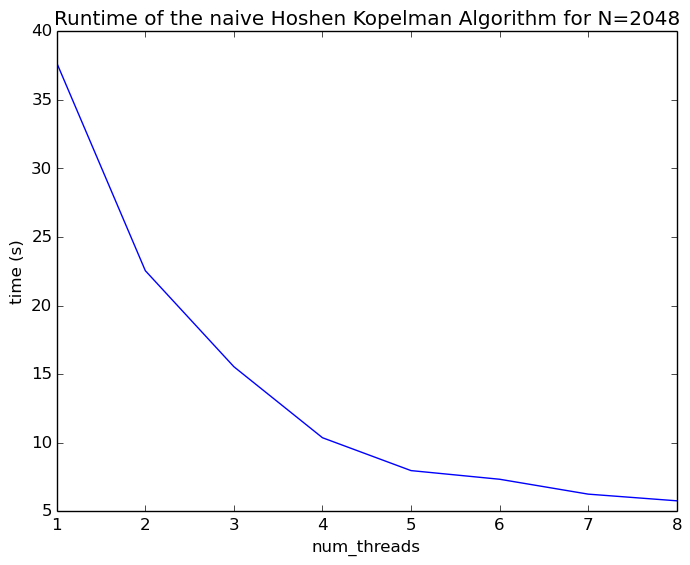

PyObject <matplotlib.text.Text object at 0x7fd06d859710>

In [102]:
#hoshen naive time
plot(1:num_threads, hoshen_naive_pthreads[:,end])
xlabel("num_threads")
ylabel("time (s)")
title("Runtime of the naive Hoshen Kopelman Algorithm for N=$size")

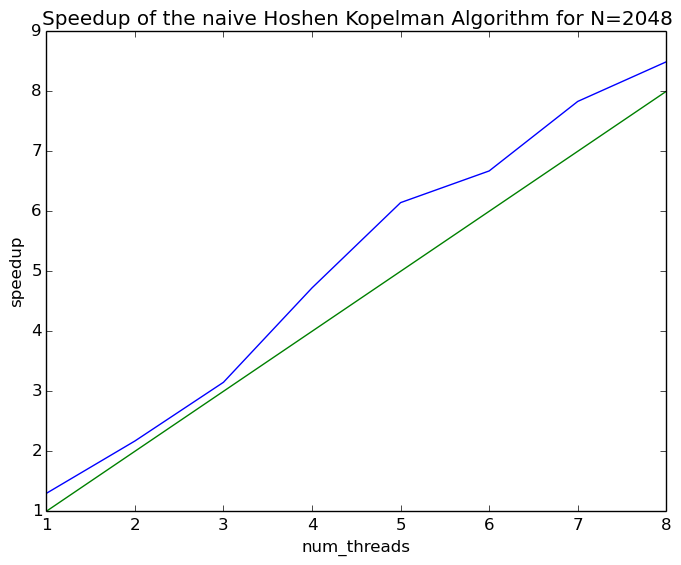

PyObject <matplotlib.text.Text object at 0x7fd06d6e3f10>

In [103]:
#naive version speedup
plot(1:num_threads, hoshen_naive[1,end]./hoshen_naive_pthreads[:, end]) #blue speedup of parallel versions
plot(1:num_threads, 1:num_threads) #green theoretical speedup
xlabel("num_threads")
ylabel("speedup")
title("Speedup of the naive Hoshen Kopelman Algorithm for N=$size")

In [104]:
hoshen_uf

1x41 Array{Float64,2}:
 0.000945003  0.00180482  0.00385717  …  1.27939  2.21643  2.5297  1.87486

In [105]:
hoshen_uf_pthreads

8x41 Array{Float64,2}:
 0.00126896  0.00277091  0.00643147  …  2.88105  3.15504  3.67916  2.79291
 0.00142957  0.00293424  0.00776095     4.96615  5.3744   6.18008  3.48479
 0.00136747  0.00272541  0.00707509     4.94864  4.83408  5.41561  3.60259
 0.00141163  0.00274222  0.00654128     5.0503   4.78325  5.19258  3.61614
 0.00302625  0.00342809  0.00682373     3.59186  5.01029  5.2584   3.8041 
 0.00286097  0.00288611  0.00967471  …  3.40357  5.03617  5.42038  3.92584
 0.00321212  0.0029076   0.00848592     3.37363  4.81552  5.46165  3.96791
 0.00316696  0.00431765  0.00834981     3.4222   4.82113  5.46261  3.81601

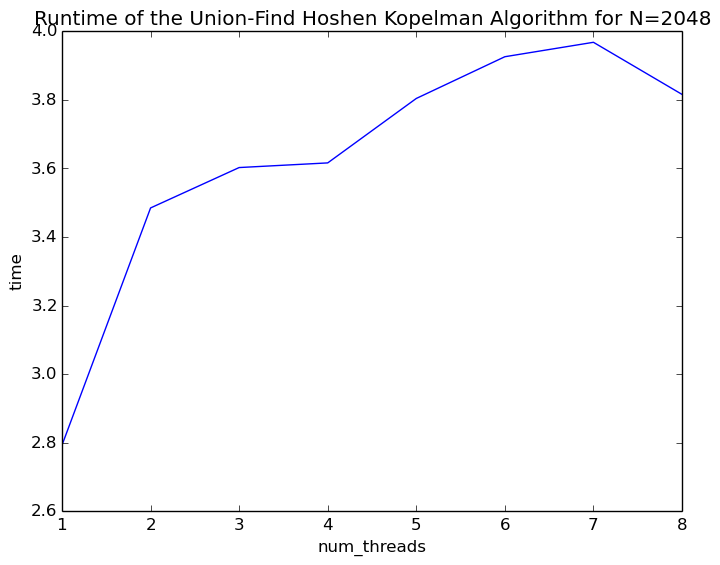

PyObject <matplotlib.text.Text object at 0x7fd06b6401d0>

In [106]:
#union find time
plot(1:num_threads, hoshen_uf_pthreads[:,end])
xlabel("num_threads")
ylabel("time")
title("Runtime of the Union-Find Hoshen Kopelman Algorithm for N=$size")

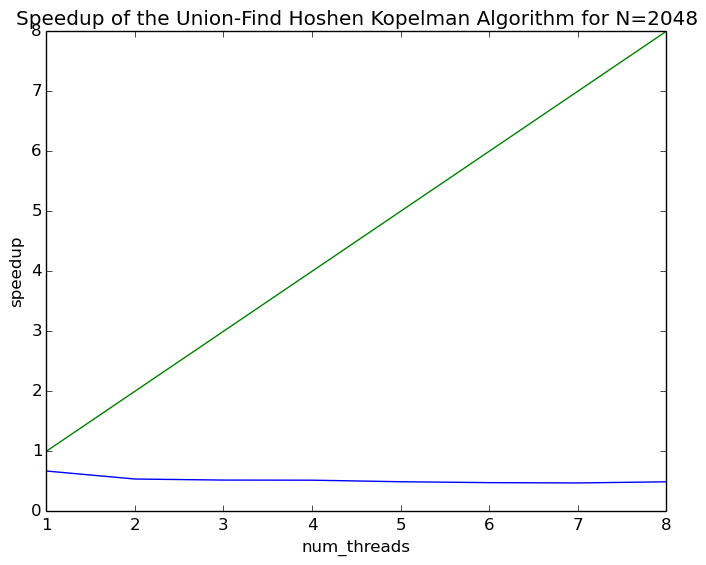

PyObject <matplotlib.text.Text object at 0x7fd06c9639d0>

In [107]:
#union find version speedup
plot(1:num_threads, hoshen_uf[1,end]./hoshen_uf_pthreads[:,end]) #blue speedup of parallel versions
plot(1:num_threads, 1:num_threads) #green theoretical speedup
xlabel("num_threads");
ylabel("speedup");
title("Speedup of the Union-Find Hoshen Kopelman Algorithm for N=$size")

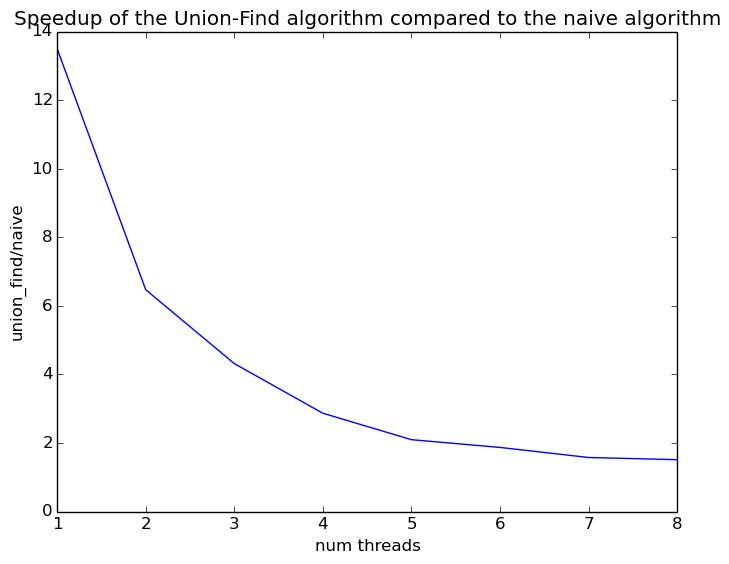

PyObject <matplotlib.text.Text object at 0x7fd06cab0550>

In [108]:
#compare naive and union find methods
plot(1:num_threads, hoshen_naive_pthreads[:,end]./hoshen_uf_pthreads[:,end])
#axhline(y=1, xmin=0, xmax=num_threads, color="green")

xlabel("num threads");
ylabel("union_find/naive");
title("Speedup of the Union-Find algorithm compared to the naive algorithm")

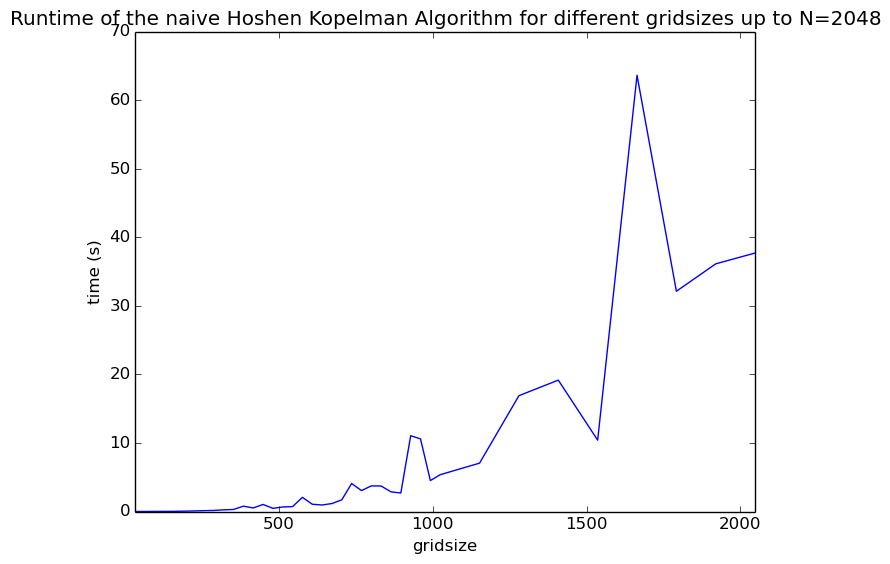

(32,2048)

In [112]:
#plot evolution of time of the naive version for growing grid sizes
plot(N[:,1],hoshen_naive_pthreads[1,:]')
xlabel("gridsize")
ylabel("time (s)")
title("Runtime of the naive Hoshen Kopelman Algorithm for different gridsizes up to N=$size")
xlim(N[1],N[end])

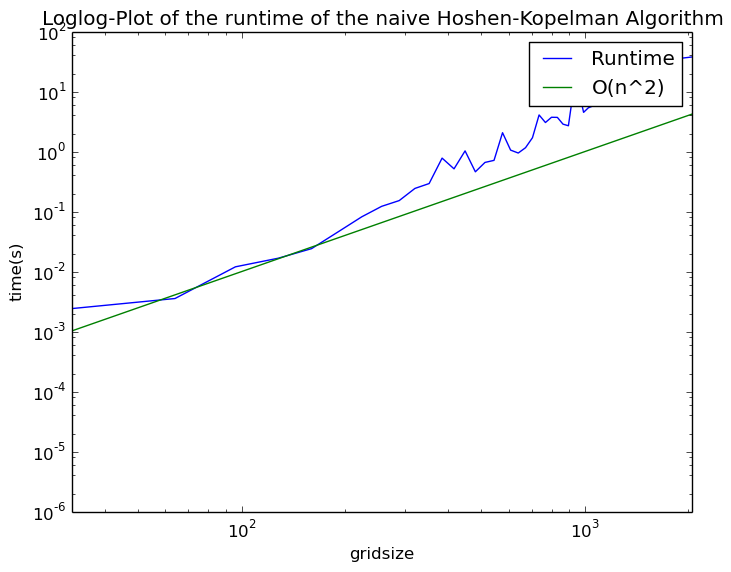

PyObject <matplotlib.legend.Legend object at 0x7fd06ccbc0d0>

In [115]:
#plot evolution of time of the union_find version for growing grid sizes
x = 1:N[end]
loglog(N[:],hoshen_naive_pthreads[1,:]') #complexity
loglog(x,x.*x / 1e6) #O(n^2)
xlim(N[1],N[end])
xlabel("gridsize")
ylabel("time(s)")
title("Loglog-Plot of the runtime of the naive Hoshen-Kopelman Algorithm")
legend(Any["Runtime","O(n^2)"])

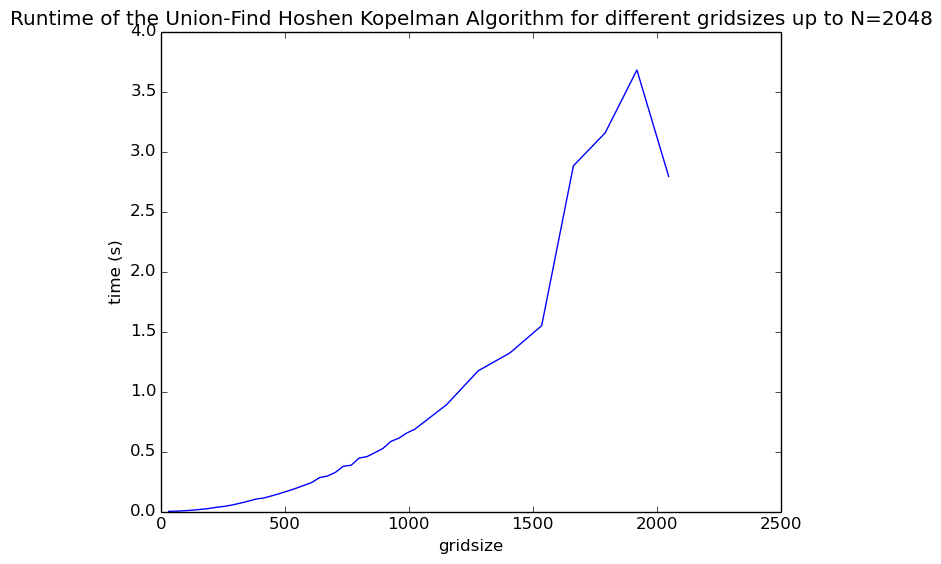

PyObject <matplotlib.text.Text object at 0x7fd06d152d10>

In [113]:
#plot evolution of time of the union_find version for growing grid sizes
plot(N[:,1],hoshen_uf_pthreads[1,:]')
xlabel("gridsize")
ylabel("time (s)")
title("Runtime of the Union-Find Hoshen Kopelman Algorithm for different gridsizes up to N=$size")

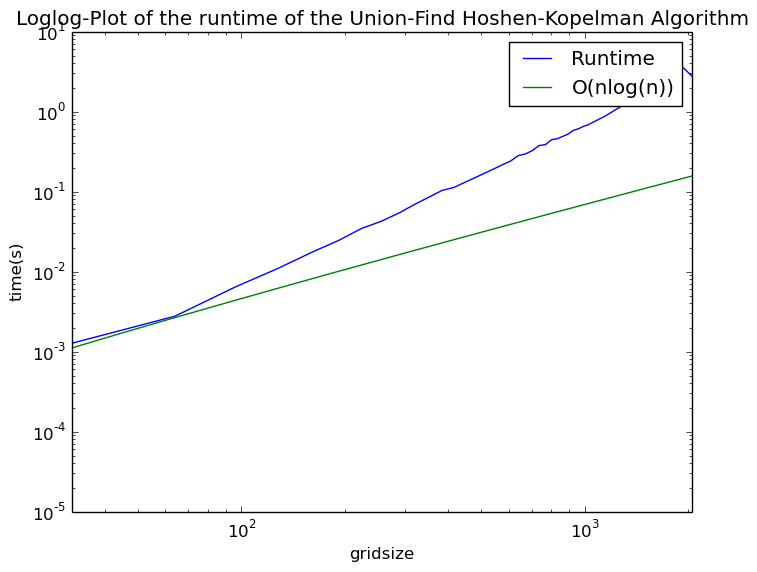

PyObject <matplotlib.legend.Legend object at 0x7fd06ccb4d50>

In [114]:
#plot evolution of time of the union_find version for growing grid sizes
x = 1:N[end,1]
loglog(N[:,1],hoshen_uf_pthreads[1,:]') #complexity
loglog(x,x.*log(x)/1e5) #O(n log(n))
xlim(N[1],N[end])
xlabel("gridsize")
ylabel("time(s)")
title("Loglog-Plot of the runtime of the Union-Find Hoshen-Kopelman Algorithm")
legend(Any["Runtime","O(nlog(n))"])